In [3]:
from prac_code.value import Value
import numpy as np

## Нестабильность тока

In [5]:
3 / 75 * np.array([2, 5, 5]).mean()

0.16

In [6]:
np.array([2, 5, 5]).mean()

4.0

## Коэффициент усиления

In [46]:
dI = Value(values=[33, 37, 45], syst=4)
I1 = Value(values=[14, 16, 15], syst=4)
I2a = Value(values=[15, 16, 16], syst=4)
dI, I1, I2a = np.array([dI, I1, I2a]) / 75 * np.array([3, 3, 75])

In [49]:
print(dI, I1, I2a)

1.5 ± 0.3 0.60 ± 0.16 16 ± 4


In [50]:
K = 1 + (dI - I1) / I2a

In [51]:
print(K)

1.06 ± 0.03


## Закон Малюса

In [12]:
angles = np.linspace(0, 360, 37)
angles

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
       330., 340., 350., 360.])

In [13]:
raw_data = np.array([
    5, 8, 12, 16, 18, 22, 21,
    23, 20, 18, 16, 14, 11,
    8, 5, 3, 2, 3, 5,
    8, 11, 15, 18, 22, 22,
    23, 22, 19, 17, 16, 12,
    9, 6, 3, 2, 3, 5
])
raw_data.shape

(37,)

In [26]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [27]:
def func(x, a):
    return np.cos(x + a) ** 2

In [31]:
theta = angles / 180 * np.pi
exp = raw_data / raw_data.max()

In [33]:
popt, pcov = curve_fit(func, theta, exp)
popt

array([1.94310683])

In [35]:
popt * 180 / np.pi

array([111.33182071])

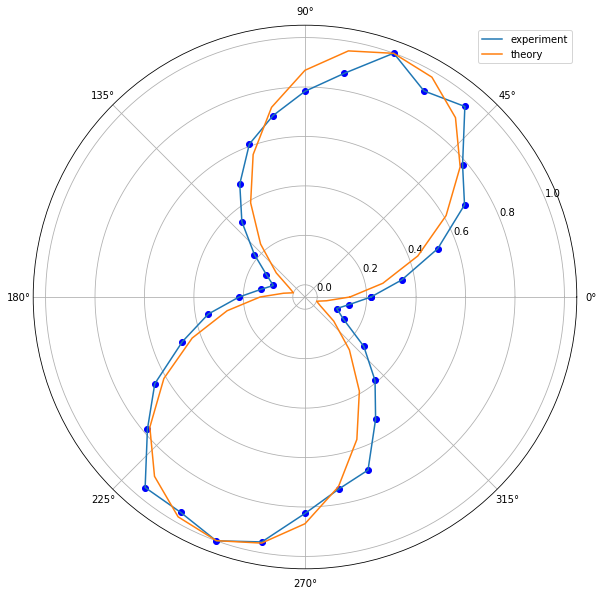

In [39]:
fig = plt.figure(figsize=(10, 10))
plt.polar(theta, exp, "bo")
plt.polar(theta, exp, label="experiment")
plt.polar(theta, np.cos(theta + popt[0]) ** 2, label="theory")
plt.legend()
plt.savefig("images/1.png")
plt.show()